# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
file_path = "pengeluaran.csv"
df = pd.read_csv(file_path)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
Index: 4512 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4512 non-null   object 
 1   daerah    4512 non-null   object 
 2   jenis     4512 non-null   object 
 3   tahun     4512 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 211.5+ KB
None
             tahun          peng
count  4512.000000  4.512000e+03
mean   2015.106383  6.012012e+05
std       4.409059  3.524052e+05
min    2007.000000  5.921600e+04
25%    2012.000000  3.476272e+05
50%    2015.000000  5.206945e+05
75%    2019.000000  7.577325e+05
max    2022.000000  2.525347e+06


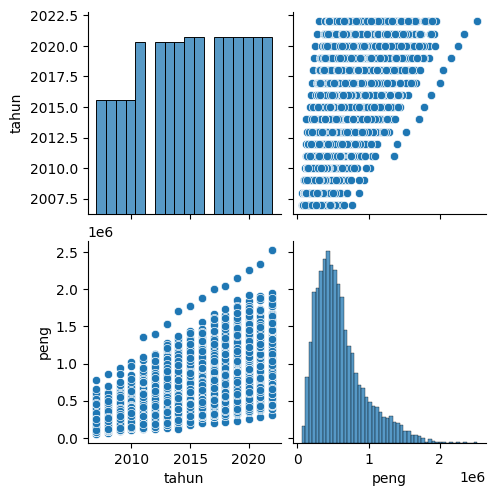

In [4]:
df.dropna(inplace=True)
print(df.info())
print(df.describe())

# Visualisasi Data
sns.pairplot(df)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [5]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])
scaler = StandardScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

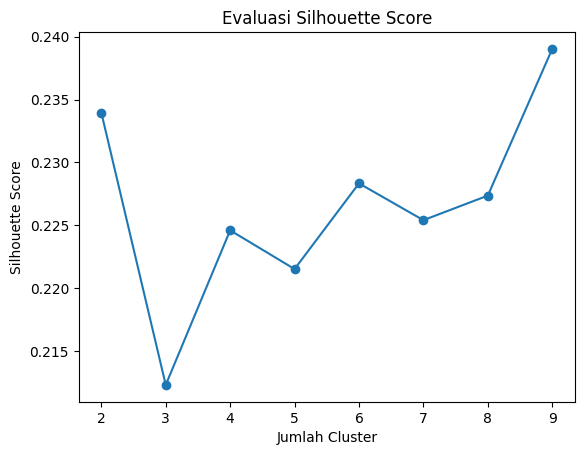

In [6]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append((k, score))

# Visualisasi Silhouette Score
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores], marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Evaluasi Silhouette Score')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [7]:
silhouette_avg = silhouette_score(df.drop(columns=['Cluster']), df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.21230395442472813


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [8]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

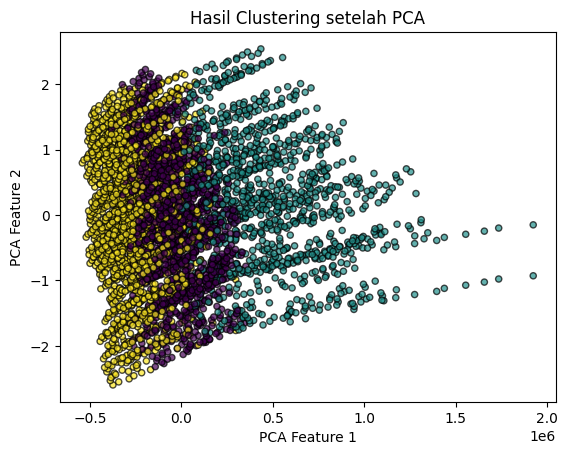

In [25]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k', s=20)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Hasil Clustering setelah PCA')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [10]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

for i in sorted(df['Cluster'].unique()):
    print(f"Cluster {i + 1}:")
    print(cluster_summary.loc[i])
    print("-" * 30)

         provinsi    daerah     jenis     tahun      peng
Cluster                                                  
0        0.005739  0.087756 -0.693073  0.705326 -0.117573
1       -0.075562  0.173771  1.168667  0.516981  1.388091
2        0.041819 -0.193301 -0.065348 -1.002510 -0.756526
Cluster 1:
provinsi    0.005739
daerah      0.087756
jenis      -0.693073
tahun       0.705326
peng       -0.117573
Name: 0, dtype: float64
------------------------------
Cluster 2:
provinsi   -0.075562
daerah      0.173771
jenis       1.168667
tahun       0.516981
peng        1.388091
Name: 1, dtype: float64
------------------------------
Cluster 3:
provinsi    0.041819
daerah     -0.193301
jenis      -0.065348
tahun      -1.002510
peng       -0.756526
Name: 2, dtype: float64
------------------------------


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [21]:
df_scaled = df[['provinsi', 'daerah', 'jenis', 'tahun', 'peng']]
df_inverse = scaler.inverse_transform(df_scaled)
df['peng_asli'] = df_inverse[:, df.columns.get_loc('peng')]

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [27]:
cluster_summary = df.groupby('Cluster').agg({
    'provinsi': lambda x: x.mode()[0],
    'daerah': lambda x: x.mode()[0],
    'jenis': lambda x: x.mode()[0],
    'tahun': ['min', 'max', 'mean'],
    'peng_asli': ['min', 'max', 'mean']
}).reset_index()

cluster_summary.columns = ['Cluster', 'Provinsi Dominan', 'Kategori Daerah', 'Jenis Pengeluaran',
                           'Tahun Min', 'Tahun Max', 'Tahun Rata-rata',
                           'Pengeluaran Min', 'Pengeluaran Max', 'Pengeluaran Rata-rata']

print(cluster_summary)

   Cluster  Provinsi Dominan  Kategori Daerah  Jenis Pengeluaran  Tahun Min  \
0        0         -0.013897         1.163318          -1.224745  -0.704624   
1        1         -1.197002         1.163318           1.224745  -1.611947   
2        2          0.577655        -1.188336           0.000000  -1.838778   

   Tahun Max  Tahun Rata-rata  Pengeluaran Min  Pengeluaran Max  \
0   1.563685         0.705326         219096.0         953320.0   
1   1.563685         0.516981         533891.0        2525347.0   
2   0.429531        -1.002510          59216.0         898019.0   

   Pengeluaran Rata-rata  
0           5.597725e+05  
1           1.090317e+06  
2           3.346269e+05  


**Analisis Cluster**

## Cluster 0 – Daerah dengan Pengeluaran Menengah
  Provinsi Dominan: Tidak spesifik (-0.0139)

  Kategori Daerah: Perkotaan (1.163)

  Jenis Pengeluaran: Lebih banyak non-makanan (-1.224)

  Rentang Tahun: 2016–2021

  Rata-rata Tahun: 2018

  Rentang Pengeluaran: Rp219.096 – Rp953.320

  Rata-rata Pengeluaran: Rp559.772

  Analisis: Cluster ini mencerminkan wilayah perkotaan dengan pengeluaran menengah, lebih banyak dialokasikan untuk kebutuhan non-makanan.

## Cluster 1 – Daerah dengan Pengeluaran Tinggi

  Provinsi Dominan: Tidak spesifik (-1.1970)

  Kategori Daerah: Perkotaan (1.163)

  Jenis Pengeluaran: Lebih banyak makanan (1.224)

  Rentang Tahun: 2015–2021

  Rata-rata Tahun: 2019

  Rentang Pengeluaran: Rp533.891 – Rp2.525.347

  Rata-rata Pengeluaran: Rp1.090.317

  Analisis: Cluster ini mencakup daerah perkotaan dengan pengeluaran tinggi, lebih banyak untuk kebutuhan makanan.

## Cluster 2 – Daerah Perdesaan dengan Pengeluaran Rendah

  Provinsi Dominan: Tidak spesifik (0.5776)

  Kategori Daerah: Perdesaan (-1.188)

  Jenis Pengeluaran: Campuran (0.000)

  Rentang Tahun: 2014–2020

  Rata-rata Tahun: 2017

  Rentang Pengeluaran: Rp59.216 – Rp898.019

  Rata-rata Pengeluaran: Rp334.627
  
  Analisis: Cluster ini menggambarkan daerah perdesaan dengan pengeluaran rendah yang cukup merata antara makanan dan non-makanan.



# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
df.to_csv("hasil_clustering.csv", index=False)